Taller 5
\
Thomas Jara
\
Santiago Lizarazo

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import curve_fit
from scipy.signal import find_peaks,peak_widths
from scipy.special import wofz
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
from numpy.random import uniform as unif
import scipy
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

Punto 1
\
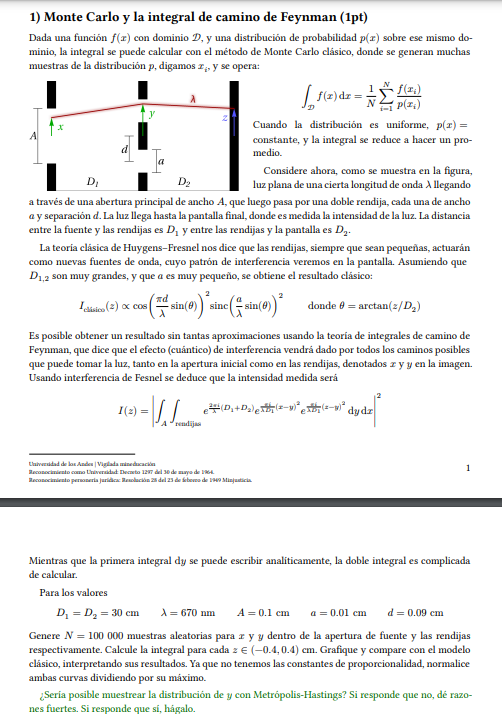

In [12]:
#Valores iniciales,todo en metros
d1=0.3
d2=d1
longitud_onda=670*10**(-9)
A=0.001
a=0.0001
d=0.0009
N=10000
z=np.linspace(-0.004,0.004,N)


Modelo Clasico

In [13]:
def intensidad_clasico(z,a,longitud_onda,d):
    theta=np.arctan(z/0.3)
    resultado=(np.cos(((np.pi*d)/longitud_onda)*np.sin(theta))**2)*(np.sinc((a/longitud_onda)*np.sin(theta))**2)
    return resultado
modelo_clasico=intensidad_clasico(z,a,longitud_onda,d1)
modelo_clasico=modelo_clasico/np.max(modelo_clasico)

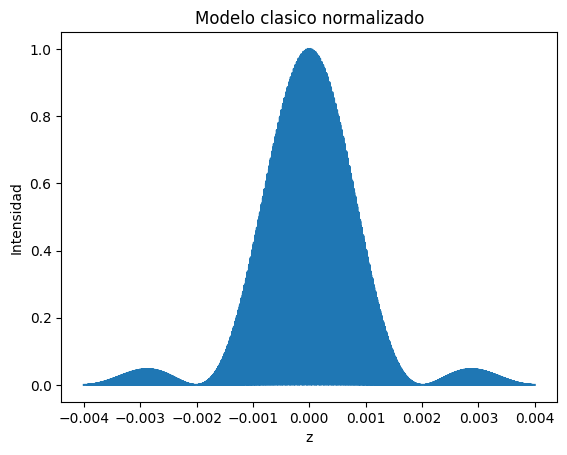

In [14]:
plt.plot(z,modelo_clasico)
plt.title('Modelo clasico normalizado')
plt.xlabel('z')
plt.ylabel('Intensidad')
plt.show()

Modelo Cuantico

In [15]:
x=unif(-A/2,A/2,N)
y1=unif(-d/2-a,-d/2,N//2)
y2=unif(d/2,d/2+a,N//2)
y=np.concatenate([y1,y2])
def montecarlo(f,a1,b1,M=N):
    suma=[]
    for i in range(M):
        suma.append(f[i]*((b1-a1)/M))
    return suma

def modelo_cuantico(x,y,z,d1=d1,longitud_onda=longitud_onda):
    resultado=(np.exp(((2*np.pi*complex(0,1))/longitud_onda)*(2*d1)))*(np.exp(((np.pi*complex(0,1))/(longitud_onda*d1))*(x-y)**2))*(np.exp(((np.pi*complex(0,1))/(longitud_onda*d1))*(z-y)**2))
    return resultado

resultados_modelo_cuantico=[]
resultados_primera=[]
for i in range(N):
    resultados=modelo_cuantico(x,y,z[i])
    resultado=np.sum(resultados)*1/N*A
    resultados_primera.append(resultado)
for i in range(N):
    resultado=resultados_primera[i]*1/N*(a)+resultados_primera[i]*1/N*(d+a)
    resultados_modelo_cuantico.append(resultado)
resultados_modelo_cuantico=np.abs(resultados_modelo_cuantico)**2
resultados_modelo_cuantico=resultados_modelo_cuantico/np.max(resultados_modelo_cuantico)



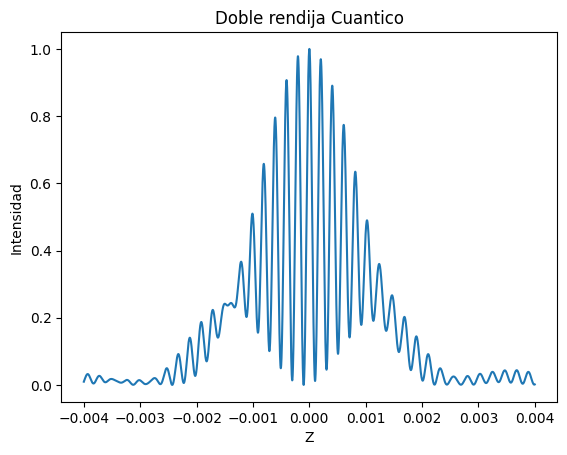

In [16]:
plt.plot(z,resultados_modelo_cuantico)
plt.title('Doble rendija Cuantico')
plt.xlabel('Z')
plt.ylabel('Intensidad')
plt.show()

La grafica clasica nos muestra un maximo de intensidad centrado y a sus lados otros dos maximos. Entre pico y pico su intensidad llega a cero dando cuenta de un patron absolutamente destructivo y constuctivo. No obstante la grafica cuantica nos muestra un patron principal que se va reduciendo conforme se aleja del centro. Es decir, no tiene unos picos secundarios bien definidos como en la forma clasica. Adicionalmente el modelo cuantico muestra como en ciertas regiones esta insidad a pesar de variar no van a ser cero. Esto se muestra en estos espacios en blanco con forma de dos picos vacios.Este modelo cuantico nos indica que las condiciones que se acercan mas a las simulaciones cuanticas no son perfectamente igual a las clasicas.

Punto 2
\
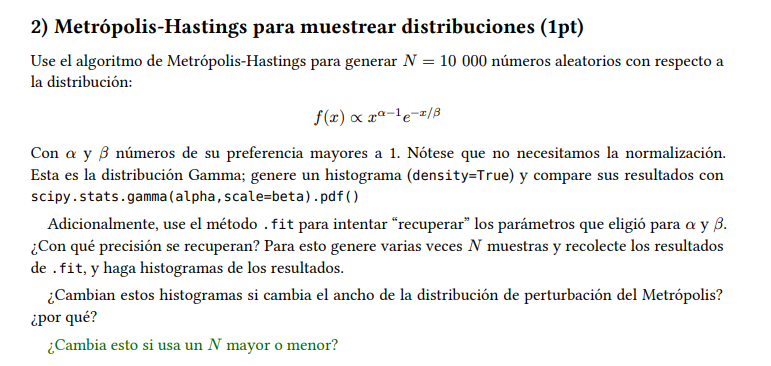

Punto 5.2

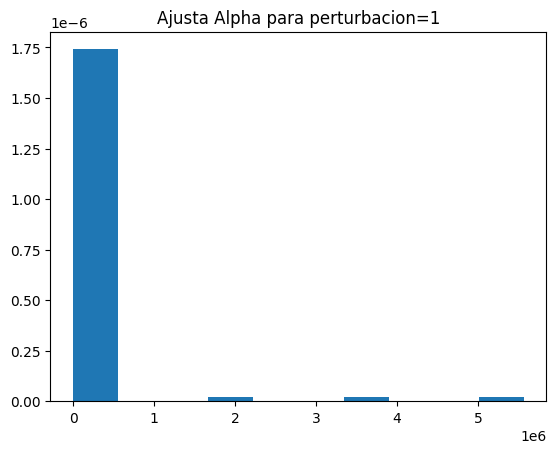

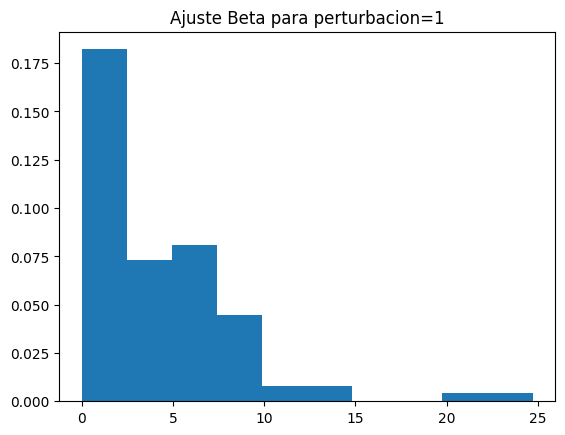

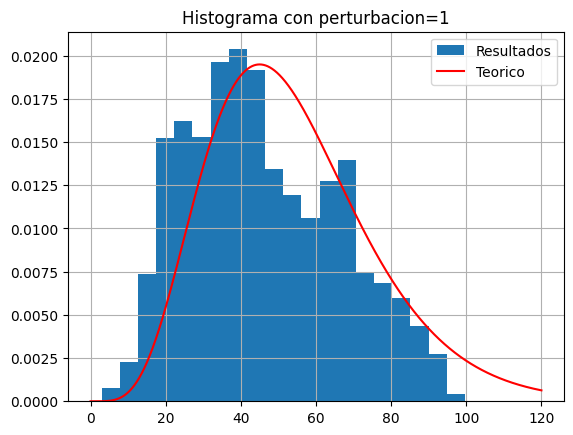

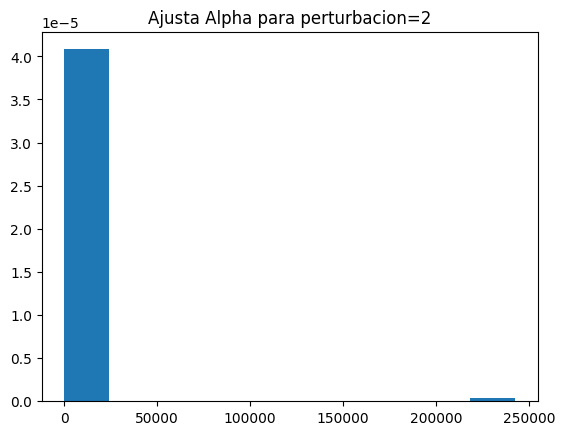

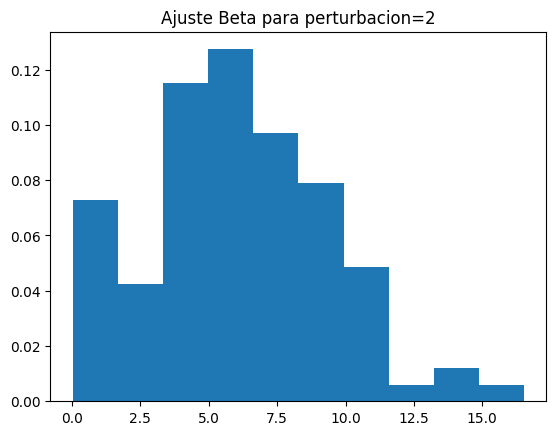

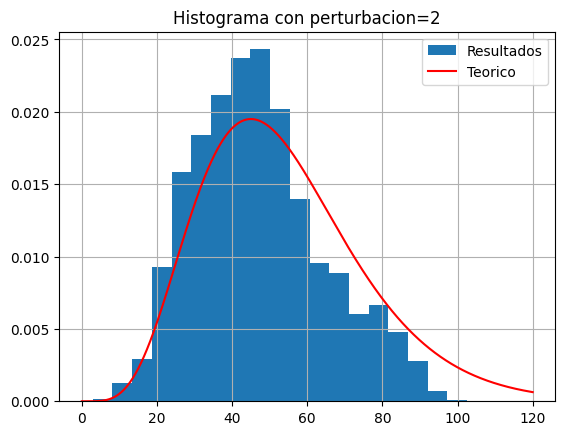

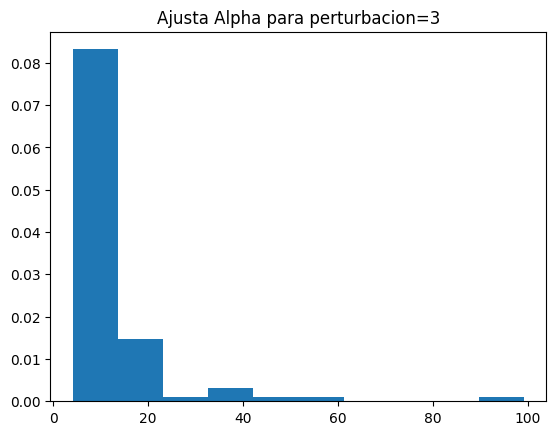

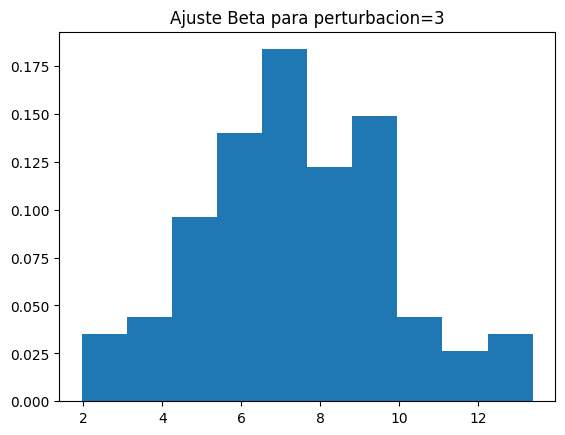

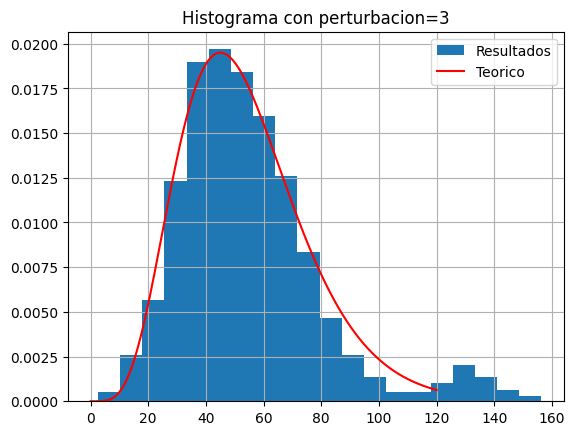

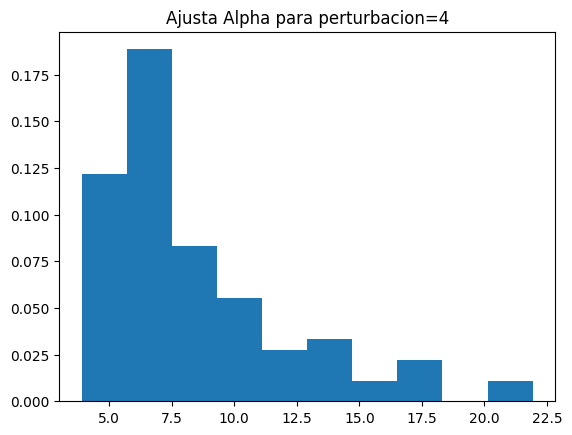

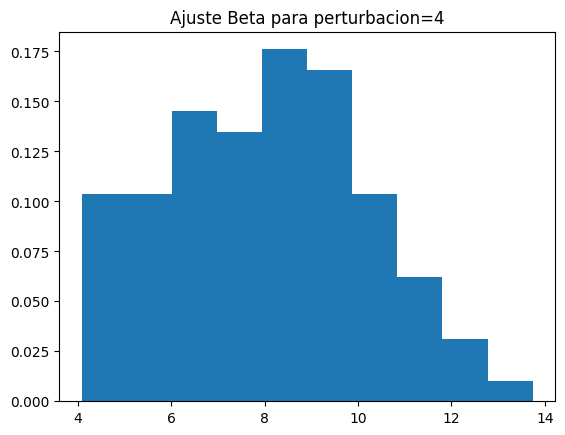

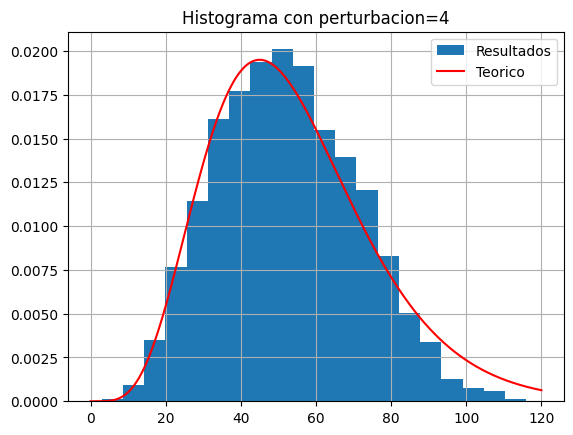

In [17]:
N=10000
x=np.linspace(0,120,N)
perturbaciones=[1,2,3,4]
a=6
b=9
def distribuicion(x,a,b):
    return (x**(a-1))*np.exp(-x/b)

def metropolis_hastings(distribuicion,N,pert,x_inicial):
    muestras=[]
    x0=x_inicial
    for i in range(N):
        candidato=np.random.normal(x0,pert)
        razon_de_aceptacion=distribuicion(candidato,a,b)/distribuicion(x0,a,b)
        if np.random.rand()<razon_de_aceptacion:
            x0=candidato
        muestras.append(x0)
    return muestras

for i in perturbaciones:
    a_fit=[]
    b_fit=[]
    for j in range(100):
        muestras=metropolis_hastings(distribuicion,N,i,3)
        params=scipy.stats.gamma.fit(muestras)
        a_fit.append(params[0])
        b_fit.append(params[2])
    plt.hist(a_fit,density=True)
    plt.title('Ajusta Alpha para perturbacion='+str(i))
    plt.show()
    plt.hist(b_fit,density=True)
    plt.title('Ajuste Beta para perturbacion='+str(i))
    plt.show()
    plt.hist(metropolis_hastings(distribuicion,N,i,3),bins=20,density=True,label='Resultados')
    plt.plot(x,scipy.stats.gamma.pdf(x,a,scale=b),label='Teorico',color='r')
    plt.title('Histograma con perturbacion='+str(i))
    plt.legend()
    plt.grid()
    plt.show()


En primer lugar comparando el histograma con la funcion original se puede observar que mayor ancho de la distribuicion de perturbacion se puede asemejar mas a la funcion original. Ademas los valores originales del fit de alpha y beta se acercan mas a los valores que impusimos inicialmente. Esto se debe a que a perturbaciones pequeñas el algoritmo propone candidatos muy cercanos a las valor actual por lo cual convergira de una forma muy lenta y se necesitaria un gran numero de muestras. Por otro lado, si la perturbacion es muy grande, permite tomar un rango mas amplio de valores pero a su vez tiene que rechazar un mayor numero de candidatos.

Punto 3
\
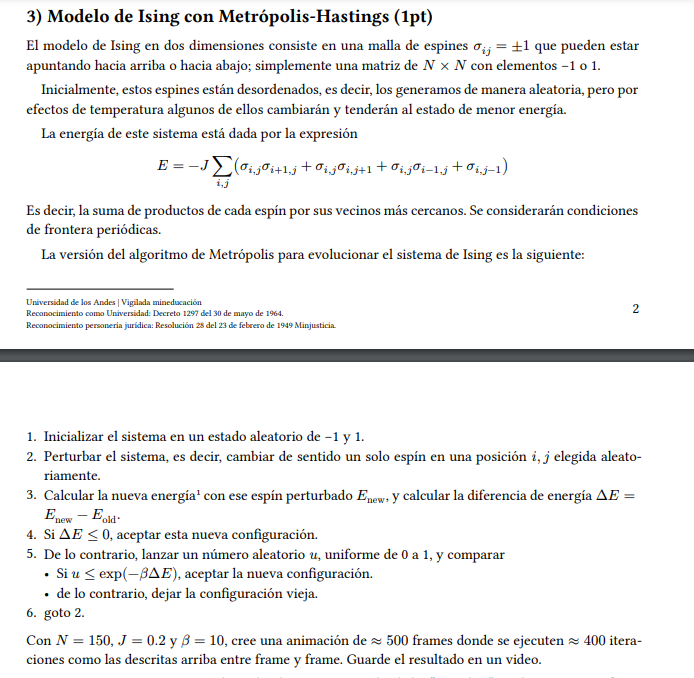

IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x0000020B16BCF820> (for post_execute):


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'energia':[0m [1m[1mCannot determine Numba type of <class 'function'>[0m
[1m
File "..\..\..\..\AppData\Local\Temp\ipykernel_13392\61609935.py", line 18:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m

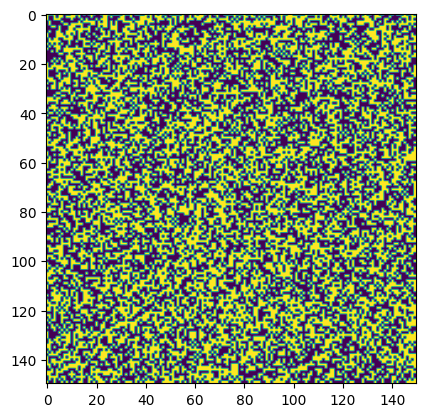

In [18]:
from numba import njit
N=150
malla=np.random.choice([-1,1],size=(N,N))
J=0.2
b=10
iteraciones=400
def energia(malla,J):
    Energia=0
    for i in range(N):
        for j in range(N):
            Energia=J * malla[i, j] * (
                malla[(i + 1) % N, j] + malla[i, (j + 1) % N] +
                malla[(i - 1) % N, j] + malla[i, (j - 1) % N])
                #use chatGPT para sacar esta formula porque siempre me daba la misma energia
    return Energia
@njit
def metropolis_ising(malla,J,b,iteraciones):
    e_old=energia(malla,J)
    for h in range(iteraciones):
        i=np.random.randint(0,N)
        j=np.random.randint(0,N)
        spin_original=malla[i][j]
        malla[i][j]=-1*malla[i][j]
        e_new=energia(malla,J)
        delta_e=e_new-e_old
        if delta_e<=0:
            e_old=e_new
        else:
            if np.random.rand()<np.exp(-b*delta_e):
                e_old=e_new
            else:
                malla[i][j]=spin_original
    return malla
fig, ax = plt.subplots()
im = ax.imshow(malla, animated=True)
def actualizar(frame):
    metropolis_ising(malla, J, b, iteraciones)
    im.set_array(malla)
    return [im]

# Crear la animación
ani = FuncAnimation(fig, actualizar, frames=500, blit=False)

# Guardar la animación como un archivo de video
ani.save('Modelo_ising.gif', writer=PillowWriter(fps=10))

# Mostrar la animación
plt.show()